<a href="https://colab.research.google.com/github/tinouirini/Homework/blob/main/teliki_ergasia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
#για wordclouds

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
#για sentiment analysis

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/report1.xlsx')
# δημιουργία dataframe από το αρχείο των δεδομένων μας

In [ ]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)
#για τυχόν duplicates και rows με missing values

In [ ]:
df.head(1)

type      source                                              title  \
0  twitter  protothema  https://twitter.com/protothema/status/16118519...   

                                                text           categories  \
0  Εξαφάνιση Ανηλίκου: Χάθηκαν τα ίχνη 12χρονης α...  εξαφανίσεις παιδιών   

  sentiment        date      time  \
0   Neutral  2023-01-08  00:27:13   

                                                link  
0  https://twitter.com/protothema/status/16118519...

In [ ]:
df['text'] = df[['title', 'text']].agg(' '.join, axis=1)
#για συνένωση των στήλων title και text

In [ ]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df['datetime']

0      2023-01-08 00:27:13
1      2023-05-06 10:36:02
2      2023-01-18 23:44:51
3      2023-06-12 12:54:27
4      2023-06-10 17:30:29
               ...        
1448   2023-02-17 21:50:28
1449   2023-01-22 19:47:57
1450   2023-01-23 23:23:29
1451   2023-01-22 13:55:38
1452   2023-01-22 23:34:54
Name: datetime, Length: 1453, dtype: datetime64[ns]

In [ ]:
# Συνάρτηση για έλεγχο αν η ώρα είναι πλήρης και έγκυρη
def is_valid_time_format(time_str):
    if time_str is None or time_str == '':
        return False
    try:
        pd.to_datetime(time_str, format='%H:%M:%S')
        return True
    except (ValueError, TypeError):
        return False



In [ ]:
# Φιλτράρισμα των γραμμών που δεν έχουν έγκυρη ώρα
df = df[df['time'].apply(is_valid_time_format)]

In [ ]:
# Συνένωση των στηλών 'date' και 'time' σε μια νέα στήλη 'datetime'
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
#Αφού μετατρέψουμε τις ημερομηνίες σε datetime, τώρα μπορούμε να φτιάξουμε στήλες με τα έτη, τους μήνες, τις μέρες κλπ.

df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['hour'] = pd.DatetimeIndex(df['datetime']).hour

In [ ]:
#!python -m spacy download el_core_news_sm

In [ ]:
# φτιάχνω κατευθείαν και το nlp για να το έχω έτοιμο για τα wordclouds μου και όποια ανάλυση κειμένου θέλω να κάνω
nlp = spacy.load('el_core_news_sm')

In [ ]:
#Λίστα με επιπλέον stopwords
custom_stopwords = ['έχει','έχουν','δυο','εξαφάνιση','εξαφανιση','εχει','ακομα','ακομη','αλλα','αλλες','αλλη','αλλης','αλλων','αν','ανα','αναμεσα','απ','απο','αρα','αραγε','αργα','αρκετα','ας','αυριο','αυτα','αυτες','αυτη','αυτην','αυτης','αυτο','αυτοι','αυτον','αυτος','αυτου','αυτους','αυτων','αφου','γι','για','γιατι','δα','δε','δει','δεινα','δεν','δηλαδη','δι','δια','διοτι','δις','διχως','εαν','ειδεμη','ειθε','ειπαν','ειπε','εις','ειτε','εκαστα','εκαστες','εκαστη','εκαστην','εκαστης','εκαστο','εκαστοι','εκαστον','εκαστος','εκαστου','εκαστους','εκαστων','εκει','εκεινα','εκεινες','εκεινη','εκεινην','εκεινης','εκεινο','εκεινοι','εκεινον','εκεινος','εκεινου','εκεινους','εκεινων','εκτος','εμας','εμεις','εμενα','εμπρος','εν','ενα','εναν','ενας','ενος','εντελως','εντος','εντωμεταξυ','ενω','ενωπιον','εξ','εξαφνα','εξης','εξισου','εξω','επανω','επειδη','επειτα','επι','επιπλεον','επισης','επομενως','εσας','εσεις','εσενα','εστω','εσυ','ετερα','ετεραι','ετερας','ετερες','ετερη','ετερης','ετερο','ετεροι','ετερον','ετερος','ετερου','ετερους','ετερων','ετουτα','ετουτες','ετουτη','ετουτην','ετουτης','ετουτο','ετουτοι','ετουτον','ετουτος','ετουτου','ετουτους','ετουτων','ετσι','ευθυς','εφεξης','εχθες','εχτες','εχω','εως','η','ηδη','ητοι','ηττον','θα','ιδια','ιδιαν','ιδιας','ιδιες','ιδιο','ιδιοι','ιδιον','ιδιος','ιδιου','ιδιους','ιδιων','ιδιως','ισαμε','ισια','ισως','καθε','καθεμια','καθεμιας','καθενα','καθενας','καθενος','καθετι','καθολου','καθως','και','καμια','καμιαν','καμιας','καν','κανεν','κανενα','κανεναν','κανενας','κανενος','κανετε','κανουμε','κανουν','καποια','καποιαν','καποιας','καποιες','καποιο','καποιοι','καποιον','καποιος','καποιου','καποιους','καποιων','καποτε','καπου','καπως','κατ','κατι','κατιτι','κατοπιν','κατω','κι','κιολας','κλπ','κοντα','κτλ','κυριως','λογω','λοιπα','λοιπον','μα','μας','μαζι','μακαρι','μαλιστα','μαλλον','μας','με','μεθαυριο','μεμιας','μεν','μερικα','μερικες','μερικοι','μερικους','μερικων','μεσα','μεσω','μετ','μετα','μεταξυ','μεχρι','μη','μηδε','μην','μηπως','μητε','μια','μιαν','μιας','μολις','μολονοτι','μονομιας','μου','να','ναι','ο','οι','ολα','ολες','ολη','ολην','ολης','ολο','ολοι','ολον','ολονεν','ολος','ολου','ολους','ολων','ολως','ολωσδιολου','ομως','οποια','οποιαδηποτε','οποιαν','οποιανδηποτε','οποιας','οποιασδηποτε','οποιδηποτε','οποιες','οποιεσδηποτε','οποιο','οποιοδηποτε','οποιοι','οποιον','οποιονδηποτε','οποιος','οποιοσδηποτε','οποιου','οποιουδηποτε','οποιους','οποιουσδηποτε','οποιων','οποιωνδηποτε','οποτε','οποτεδηποτε','οπου','οπουδηποτε','οπως','ορισμενα','ορισμενες','ορισμενων','ορισμενως','οσα','οσαδηποτε','οσες','οσεσδηποτε','οση','οσηδηποτε','οσην','οσηνδηποτε','οσης','οσησδηποτε','οσο','οσοδηποτε','οσοι','οσοιδηποτε','οσον','οσονδηποτε','οσος','οσοσδηποτε','οσου','οσουδηποτε','οσους','οσουσδηποτε','οσων','οσωνδηποτε','οταν','οτι','οτιδηποτε','οτου','ου','ουδε','ουτε','παντα','παντοτε','παντου','παντως','παρ','παρα','πει','περα','περι','περιπου','περσι','περυσι','πια','πιθανον','πιο','πισω','πλαι','πλεον','πλην','ποια','ποιαν','ποιας','ποιες','ποιο','ποιοι','ποιον','ποιος','ποιου','ποιους','ποιων','πολλα','πολυ','ποσες','ποση','ποσην','ποσης','ποσο','ποσοι','ποσος','ποσους','ποτε','που','πουθε','πουθενα','πρεπει','πριν','προ','προκειται','προς','προτου','προχθες','προχτες','πρωτα','πρωτη','πρωτης','πρωτυτερα','πως','σαν','σας','σε','σεις','σημερα','σιγα','σου','στα','στη','στην','στης','στις','στο','στον','στου','στους','στων','συν','συχνα','συχνας','συχνες','συχνη','συχνην','συχνης','συχνο','συχνοι','συχνον','συχνος','συχνου','συχνου','συχνους','συχνων','συχνως','σχεδον','σωστα','τα','ταδε','ταυτα','ταυτες','ταυτη','ταυτην','ταυτης','ταυτο','ταυτον','ταυτος','ταυτου','ταυτοχρονα','ταυτων','τελικα','τελικως','τες','τετοια','τετοιαν','τετοιας','τετοιες','τετοιο','τετοιοι','τετοιον','τετοιος','τετοιου','τετοιους','τετοιων','τη','την','της','τι','τιποτα','τιποτε','τις','το','τοι','τον','τος','τοσα','τοσες','τοση','τοσην','τοσης','τοσο','τοσοι','τοσον','τοσος','τοσου','τοσους','τοσων','τοτε','του','τουλαχιστο','τουλαχιστον','τους','τουτα','τουτες','τουτη','τουτην','τουτης','τουτο','τουτοι','τουτοις','τουτον','τουτος','τουτου','τουτους','τουτων','τυχον','των','τωρα','υπ','υπερ','υπο','υποψη','υποψιν','υστερα','χθες','χτες','χωρις','ψηλα','ω','ως','ωσαν','ωσοτου','ωσπου','ωστε','ωστοσο','ωχ']

In [ ]:
# εισάγουμε το csv του emolex
emolex_csv_path = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(emolex_csv_path)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
# πετάμε τυχόν duplicates και rows με missiong values
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)
emolex_df.tail(1)

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  Joy  \
13160  ζουμ       0.0       0.0    0.0           0.0      0.0   0.0  0.0   

       Sadness  Surprise  Trust  
13160      0.0       0.0    0.0

In [ ]:
# Φτιάξε ένα df με positive words
positive_words_df = emolex_df[emolex_df.Positive == 1][['word']]
# Μετονόμασε τη στήλη "word" σε "positive_words"
positive_words_df = positive_words_df.rename(columns={"word":"positive_words"}).reset_index(drop=True)

# Φτιάξε ένα df με negative words
negative_words_df = emolex_df[emolex_df.Negative == 1][['word']]
# Μετονόμασε τη στήλη "word" σε "negative_words"
negative_words_df = negative_words_df.rename(columns={"word":"negative_words"}).reset_index(drop=True)

# Φτιάξε ένα df με anger words
angry_words_df = emolex_df[emolex_df.Anger == 1][['word']]
# Μετονόμασε τη στήλη "word" σε "angry_words"
angry_words_df = angry_words_df.rename(columns={"word":"angry_words"}).reset_index(drop=True)

# Φτιάξε ένα df με anticipation words
anticipation_words_df = emolex_df[emolex_df.Anticipation == 1][['word']]
# Μετονόμασε τη στήλη "word" σε "anticipation_words"
anticipation_words_df = anticipation_words_df.rename(columns={"word":"anticipation_words"}).reset_index(drop=True)

# Φτιάξε ένα df με disgust words
disgust_words_df = emolex_df[emolex_df.Disgust == 1][['word']]
# Μετονόμασε τη στήλη "word" σε "disgust_words"
disgust_words_df = disgust_words_df.rename(columns={"word":"disgust_words"}).reset_index(drop=True)

# Φτιάξε ένα df με fear words
fear_words_df = emolex_df[emolex_df.Fear == 1][['word']]
# Μετονόμασε τη στήλη "word" σε "fear_words"
fear_words_df = fear_words_df.rename(columns={"word":"fear_words"}).reset_index(drop=True)

# Φτιάξε ένα df με joy words
joy_words_df = emolex_df[emolex_df.Joy == 1][['word']]
# Μετονόμασε τη στήλη "word" σε "joy_words"
joy_words_df = joy_words_df.rename(columns={"word":"joy_words"}).reset_index(drop=True)

# Φτιάξε ένα df με sadness words
sadness_words_df = emolex_df[emolex_df.Sadness == 1][['word']]
# Μετονόμασε τη στήλη "word" σε "sadness_words"
sadness_words_df = sadness_words_df.rename(columns={"word":"sadness_words"}).reset_index(drop=True)

# Φτιάξε ένα df με surprise words
surprise_words_df = emolex_df[emolex_df.Surprise == 1][['word']]
# Μετονόμασε τη στήλη "word" σε "surprise_words"
surprise_words_df = surprise_words_df.rename(columns={"word":"surprise_words"}).reset_index(drop=True)

# Φτιάξε ένα df με trust words
trust_words_df = emolex_df[emolex_df.Trust == 1][['word']]
# Μετονόμασε τη στήλη "word" σε "trust_words"
trust_words_df = trust_words_df.rename(columns={"word":"trust_words"}).reset_index(drop=True)

In [ ]:
# δημιουργία λίστας με τα παραπάνω dfs (βάζω και τη στήλη word από το emolex_df για να έχω μια στήλη και με όλες τις λέξεις)
dfList = [emolex_df[["word"]],
          positive_words_df,
          negative_words_df,
          angry_words_df,
          anticipation_words_df,
          disgust_words_df,
          fear_words_df,
          joy_words_df,
          sadness_words_df,
          surprise_words_df,
          trust_words_df]

In [ ]:
# δημιουργία df που αποτελείται από τη συνένωση των παραπάνω dfs
emotions_df = pd.concat(dfList,axis=1)

In [ ]:
emotions_df.tail(1)

word positive_words negative_words angry_words anticipation_words  \
13160  ζουμ            NaN            NaN         NaN                NaN   

      disgust_words fear_words joy_words sadness_words surprise_words  \
13160           NaN        NaN       NaN           NaN            NaN   

      trust_words  
13160         NaN

In [ ]:
file_path = "/content/gdrive/MyDrive/report1/emotions_worlds.xlsx"

In [ ]:
# Έλεγχος και δημιουργία του φακέλου αν δεν υπάρχει
import os
folder_path = os.path.dirname(file_path)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Ο φάκελος δημιουργήθηκε επιτυχώς: {folder_path}")
else:
    print(f"Ο φάκελος υπάρχει ήδη: {folder_path}")

Ο φάκελος υπάρχει ήδη: /content/gdrive/MyDrive/report1


In [ ]:
# αποθήκευση του emotion_df στο drive
emotions_df.to_excel("/content/gdrive/MyDrive/report1/emotions_worlds.xlsx", index=False)

In [ ]:
emotions_df

word        positive_words    negative_words  \
0                αφεση                 αφεση              υδρα   
1      ενορκη βεβαιωση                  αμην            απατσι   
2              εχοντας             αυγουστος          γαιδαρος   
3                  εχω        γαμηλιο ταξιδι           γιαννης   
4                 οριο  διευθυντρια σχολειου  δευτερα παρουσια   
...                ...                   ...               ...   
13156        ουρλιασμα                   NaN               NaN   
13157     κροκος αυγου                   NaN               NaN   
13158         νεοτερος                   NaN               NaN   
13159          ζεφυρος                   NaN               NaN   
13160             ζουμ                   NaN               NaN   

            angry_words anticipation_words     disgust_words  \
0      δευτερα παρουσια     γαμηλιο ταξιδι          γαιδαρος   
1          λυρικη σκηνη       γνωστοποιηση           γιαννης   
2               προσοχη   δευτερα παρουσια  δευτερα παρουσια   
3             ραγισμενο         εγγραφειτε          περιεργο   
4      σπονδυλικη στηλη           εκκλησια    προκαθορισμενο   
...                 ...                ...               ...   
13156               NaN                NaN               NaN   
13157               NaN                NaN               NaN   
13158               NaN                NaN               NaN   
13159               NaN                NaN               NaN   
13160               NaN                NaN               NaN   

             fear_words       joy_words     sadness_words    surprise_words  \
0                  υδρα            αμην  δευτερα παρουσια    γαμηλιο ταξιδι   
1                απατσι  γαμηλιο ταξιδι          δευτερον      λυρικη σκηνη   
2      δευτερα παρουσια        εκκλησια          εξαρτηση  τυχερα παιχνιδια   
3              εξαρτηση            ζητω        κορσικανος          φεστιβαλ   
4          λυρικη σκηνη    λυρικη σκηνη      λυρικη σκηνη           αγγελος   
...                 ...             ...               ...               ...   
13156               NaN             NaN               NaN               NaN   
13157               NaN             NaN               NaN               NaN   
13158               NaN             NaN               NaN               NaN   
13159               NaN             NaN               NaN               NaN   
13160               NaN             NaN               NaN               NaN   

                trust_words  
0                      αμην  
1            γαμηλιο ταξιδι  
2      διευθυντρια σχολειου  
3                επικοινωνω  
4                  εκκλησια  
...                     ...  
13156                   NaN  
13157                   NaN  
13158                   NaN  
13159                   NaN  
13160                   NaN  

[13161 rows x 11 columns]

In [ ]:
df.tail(3)

type           source  \
1450  twitter  TkFpJF0pcpFRQB3   
1451  twitter  someone25988041   
1452  twitter   Another_Alien_   

                                                  title  \
1450  https://twitter.com/TkFpJF0pcpFRQB3/status/161...   
1451  https://twitter.com/someone25988041/status/161...   
1452  https://twitter.com/Another_Alien_/status/1617...   

                                                   text           categories  \
1450  https://twitter.com/TkFpJF0pcpFRQB3/status/161...  εξαφανίσεις παιδιών   
1451  https://twitter.com/someone25988041/status/161...  εξαφανίσεις παιδιών   
1452  https://twitter.com/Another_Alien_/status/1617...  εξαφανίσεις παιδιών   

     sentiment        date      time  \
1450  Positive  2023-01-23  23:23:29   
1451  Positive  2023-01-22  13:55:38   
1452  Positive  2023-01-22  23:34:54   

                                                   link            datetime  \
1450  https://twitter.com/TkFpJF0pcpFRQB3/status/161... 2023-01-23 23:23:29   
1451  https://twitter.com/someone25988041/status/161... 2023-01-22 13:55:38   
1452  https://twitter.com/Another_Alien_/status/1617... 2023-01-22 23:34:54   

      year  month  day  hour  
1450  2023      1   23    23  
1451  2023      1   22    13  
1452  2023      1   22    23

<Axes: xlabel='month'>

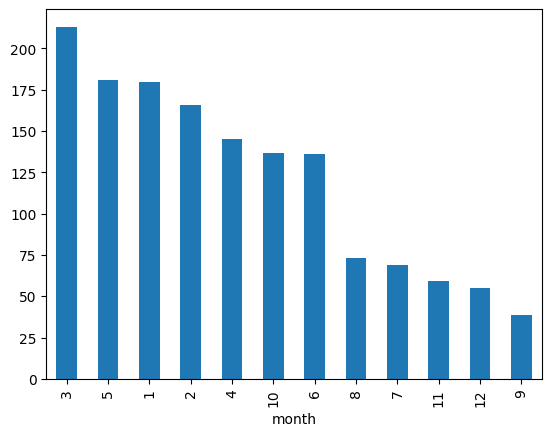

In [ ]:
df['month'].value_counts().plot(kind='bar')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
df['text']

0       https://twitter.com/protothema/status/16118519...
1       https://twitter.com/hamogelo/status/1654750887...
2       https://twitter.com/AthensVoice/status/1615827...
3       https://twitter.com/Kouti_Pandoras/status/1668...
4       Χαμόγελο του Παιδιού: Εξαφανίστηκε 12χρονη από...
                              ...                        
1448    https://twitter.com/happyandfedup2/status/1626...
1449    https://twitter.com/eydokia_p/status/161721749...
1450    https://twitter.com/TkFpJF0pcpFRQB3/status/161...
1451    https://twitter.com/someone25988041/status/161...
1452    https://twitter.com/Another_Alien_/status/1617...
Name: text, Length: 1453, dtype: object

In [ ]:
# Ισως καποτε χρειαστεί να αφαιρέσουμε τους τόνους.....
text = df['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [ ]:
#ενώνω τα κείμενα
text = df['text'].str.cat(sep = ' ')

In [ ]:
text

'https://twitter.com/protothema/status/1611851960382099457 Εξαφάνιση Ανηλίκου: Χάθηκαν τα ίχνη 12χρονης από την Αθήνα https://t.co/zQBGVbzQlZ https://twitter.com/hamogelo/status/1654750887368175618 RT @AntennaNews: Εξαφάνιση ανηλίκου από τη Μύκονο https://t.co/gUI1p1FTUH  #Ant1news @hamogelo https://t.co/1AC3eikOUY https://twitter.com/AthensVoice/status/1615827558708256789 Χαμόγελο του Παιδιού: Αύξηση 74% στις εξαφανίσεις παιδιών και εφήβων το 2022 https://t.co/MuNTGWO5RQ https://t.co/phEsDrqVZG https://twitter.com/Kouti_Pandoras/status/1668187892332523525 Για το 2022 δηλώθηκαν περίπου 101 εξαφανίσεις παιδιών και 199 ενήλικων #εξαφανισεις #ανηλικοι\nhttps://t.co/8Z7rDsnrHv Χαμόγελο του Παιδιού: Εξαφανίστηκε 12χρονη από την Ηλιούπολη Χαμόγελο του Παιδιού\nεξαφάνιση ανηλίκου\nΣυναγερμό έχει προκαλέσει στις Αρχές η εξαφάνιση της 12χρονης Στέλλας Γ. από την Ηλιούπολη, την οποία και αναζητούν.\nΣύμφωνα με το\nΧαμόγελο του Παιδιού\n, η ανήλικη έχει μαύρα μαλλιά και καστανά μάτια και την ημέρ

In [ ]:
extra_stopwords = {"παιδί", "παιδιού", "παιδιά", 'εξαφανίσεις παιδίων',"εξαφάνιση,'έχει','οπου','έχουν','δυο','εξαφάνιση','εξαφανιση','εχει','ακομα','ακομη','αλλα','αλλες','αλλη','αλλης','αλλων','αν','ανα','αναμεσα','απ','απο','αρα','αραγε','αργα','αρκετα','ας','αυριο','αυτα','αυτες','αυτη','αυτην','αυτης','αυτο','αυτοι','αυτον','αυτος','αυτου','αυτους','αυτων','αφου','γι','για','γιατι','δα','δε','δει','δεινα','δεν','δηλαδη','δι','δια','διοτι','δις','διχως','εαν','ειδεμη','ειθε','ειπαν','ειπε','εις','ειτε','εκαστα','εκαστες','εκαστη','εκαστην','εκαστης','εκαστο','εκαστοι','εκαστον','εκαστος','εκαστου','εκαστους','εκαστων','εκει','εκεινα','εκεινες','εκεινη','εκεινην','εκεινης','εκεινο','εκεινοι','εκεινον','εκεινος','εκεινου','εκεινους','εκεινων','εκτος','εμας','εμεις','εμενα','εμπρος','εν','ενα','εναν','ενας','ενος','εντελως','εντος','εντωμεταξυ','ενω','ενωπιον','εξ','εξαφνα','εξης','εξισου','εξω','επανω','επειδη','επειτα','επι','επιπλεον','επισης','επομενως','εσας','εσεις','εσενα','εστω','εσυ','ετερα','ετεραι','ετερας','ετερες','ετερη','ετερης','ετερο','ετεροι','ετερον','ετερος','ετερου','ετερους','ετερων','ετουτα','ετουτες','ετουτη','ετουτην','ετουτης','ετουτο','ετουτοι','ετουτον','ετουτος','ετουτου','ετουτους','ετουτων','ετσι','ευθυς','εφεξης','εχθες','εχτες','εχω','εως','η','ηδη','ητοι','ηττον','θα','ιδια','ιδιαν','ιδιας','ιδιες','ιδιο','ιδιοι','ιδιον','ιδιος','ιδιου','ιδιους','ιδιων','ιδιως','ισαμε','ισια','ισως','καθε','καθεμια','καθεμιας','καθενα','καθενας','καθενος','καθετι','καθολου','καθως','και','καμια','καμιαν','καμιας','καν','κανεν','κανενα','κανεναν','κανενας','κανενος','κανετε','κανουμε','κανουν','καποια','καποιαν','καποιας','καποιες','καποιο','καποιοι','καποιον','καποιος','καποιου','καποιους','καποιων','καποτε','καπου','καπως','κατ','κατι','κατιτι','κατοπιν','κατω','κι','κιολας','κλπ','κοντα','κτλ','κυριως','λογω','λοιπα','λοιπον','μα','μας','μαζι','μακαρι','μαλιστα','μαλλον','μας','με','μεθαυριο','μεμιας','μεν','μερικα','μερικες','μερικοι','μερικους','μερικων','μεσα','μεσω','μετ','μετα','μεταξυ','μεχρι','μη','μηδε','μην','μηπως','μητε','μια','μιαν','μιας','μολις','μολονοτι','μονομιας','μου','να','ναι','ο','οι','ολα','ολες','ολη','ολην','ολης','ολο','ολοι','ολον','ολονεν','ολος','ολου','ολους','ολων','ολως','ολωσδιολου','ομως','οποια','οποιαδηποτε','οποιαν','οποιανδηποτε','οποιας','οποιασδηποτε','οποιδηποτε','οποιες','οποιεσδηποτε','οποιο','οποιοδηποτε','οποιοι','οποιον','οποιονδηποτε','οποιος','οποιοσδηποτε','οποιου','οποιουδηποτε','οποιους','οποιουσδηποτε','οποιων','οποιωνδηποτε','οποτε','οποτεδηποτε','οπου','οπουδηποτε','οπως','ορισμενα','ορισμενες','ορισμενων','ορισμενως','οσα','οσαδηποτε','οσες','οσεσδηποτε','οση','οσηδηποτε','οσην','οσηνδηποτε','οσης','οσησδηποτε','οσο','οσοδηποτε','οσοι','οσοιδηποτε','οσον','οσονδηποτε','οσος','οσοσδηποτε','οσου','οσουδηποτε','οσους','οσουσδηποτε','οσων','οσωνδηποτε','οταν','οτι','οτιδηποτε','οτου','ου','ουδε','ουτε','παντα','παντοτε','παντου','παντως','παρ','παρα','πει','περα','περι','περιπου','περσι','περυσι','πια','πιθανον','πιο','πισω','πλαι','πλεον','πλην','ποια','ποιαν','ποιας','ποιες','ποιο','ποιοι','ποιον','ποιος','ποιου','ποιους','ποιων','πολλα','πολυ','ποσες','ποση','ποσην','ποσης','ποσο','ποσοι','ποσος','ποσους','ποτε','που','πουθε','πουθενα','πρεπει','πριν','προ','προκειται','προς','προτου','προχθες','προχτες','πρωτα','πρωτη','πρωτης','πρωτυτερα','πως','σαν','σας','σε','σεις','σημερα','σιγα','σου','στα','στη','στην','στης','στις','στο','στον','στου','στους','στων','συν','συχνα','συχνας','συχνες','συχνη','συχνην','συχνης','συχνο','συχνοι','συχνον','συχνος','συχνου','συχνου','συχνους','συχνων','συχνως','σχεδον','σωστα','τα','ταδε','ταυτα','ταυτες','ταυτη','ταυτην','ταυτης','ταυτο','ταυτον','ταυτος','ταυτου','ταυτοχρονα','ταυτων','τελικα','τελικως','τες','τετοια','τετοιαν','τετοιας','τετοιες','τετοιο','τετοιοι','τετοιον','τετοιος','τετοιου','τετοιους','τετοιων','τη','την','της','τι','τιποτα','τιποτε','τις','το','τοι','τον','τος','τοσα','τοσες','τοση','τοσην','τοσης','τοσο','τοσοι','τοσον','τοσος','τοσου','τοσους','τοσων','τοτε','του','τουλαχιστο','τουλαχιστον','τους','τουτα','τουτες','τουτη','τουτην','τουτης','τουτο','τουτοι','τουτοις','τουτον','τουτος','τουτου','τουτους','τουτων','τυχον','των','τωρα','υπ','υπερ','υπο','υποψη','υποψιν','υστερα','χθες','χτες','χωρις','ψηλα','ω','ως','ωσαν','ωσοτου','ωσπου','ωστε','ωστοσο','ωχ'"}

# Προσθήκη των extra_stopwords στις default stop words του spaCy
all_stopwords = set(nlp.Defaults.stop_words).union(["παιδί", "παιδιού", "παιδιά", 'εξαφανίσεις παιδίων',"εξαφάνιση",'έχει','οπου','έχουν','δυο','εξαφάνιση','εξαφανιση','εχει','ακομα','ακομη','αλλα','αλλες','αλλη','αλλης','αλλων','αν','ανα','αναμεσα','απ','απο','αρα','αραγε','αργα','αρκετα','ας','αυριο','αυτα','αυτες','αυτη','αυτην','αυτης','αυτο','αυτοι','αυτον','αυτος','αυτου','αυτους','αυτων','αφου','γι','για','γιατι','δα','δε','δει','δεινα','δεν','δηλαδη','δι','δια','διοτι','δις','διχως','εαν','ειδεμη','ειθε','ειπαν','ειπε','εις','ειτε','εκαστα','εκαστες','εκαστη','εκαστην','εκαστης','εκαστο','εκαστοι','εκαστον','εκαστος','εκαστου','εκαστους','εκαστων','εκει','εκεινα','εκεινες','εκεινη','εκεινην','εκεινης','εκεινο','εκεινοι','εκεινον','εκεινος','εκεινου','εκεινους','εκεινων','εκτος','εμας','εμεις','εμενα','εμπρος','εν','ενα','εναν','ενας','ενος','εντελως','εντος','εντωμεταξυ','ενω','ενωπιον','εξ','εξαφνα','εξης','εξισου','εξω','επανω','επειδη','επειτα','επι','επιπλεον','επισης','επομενως','εσας','εσεις','εσενα','εστω','εσυ','ετερα','ετεραι','ετερας','ετερες','ετερη','ετερης','ετερο','ετεροι','ετερον','ετερος','ετερου','ετερους','ετερων','ετουτα','ετουτες','ετουτη','ετουτην','ετουτης','ετουτο','ετουτοι','ετουτον','ετουτος','ετουτου','ετουτους','ετουτων','ετσι','ευθυς','εφεξης','εχθες','εχτες','εχω','εως','η','ηδη','ητοι','ηττον','θα','ιδια','ιδιαν','ιδιας','ιδιες','ιδιο','ιδιοι','ιδιον','ιδιος','ιδιου','ιδιους','ιδιων','ιδιως','ισαμε','ισια','ισως','καθε','καθεμια','καθεμιας','καθενα','καθενας','καθενος','καθετι','καθολου','καθως','και','καμια','καμιαν','καμιας','καν','κανεν','κανενα','κανεναν','κανενας','κανενος','κανετε','κανουμε','κανουν','καποια','καποιαν','καποιας','καποιες','καποιο','καποιοι','καποιον','καποιος','καποιου','καποιους','καποιων','καποτε','καπου','καπως','κατ','κατι','κατιτι','κατοπιν','κατω','κι','κιολας','κλπ','κοντα','κτλ','κυριως','λογω','λοιπα','λοιπον','μα','μας','μαζι','μακαρι','μαλιστα','μαλλον','μας','με','μεθαυριο','μεμιας','μεν','μερικα','μερικες','μερικοι','μερικους','μερικων','μεσα','μεσω','μετ','μετα','μεταξυ','μεχρι','μη','μηδε','μην','μηπως','μητε','μια','μιαν','μιας','μολις','μολονοτι','μονομιας','μου','να','ναι','ο','οι','ολα','ολες','ολη','ολην','ολης','ολο','ολοι','ολον','ολονεν','ολος','ολου','ολους','ολων','ολως','ολωσδιολου','ομως','οποια','οποιαδηποτε','οποιαν','οποιανδηποτε','οποιας','οποιασδηποτε','οποιδηποτε','οποιες','οποιεσδηποτε','οποιο','οποιοδηποτε','οποιοι','οποιον','οποιονδηποτε','οποιος','οποιοσδηποτε','οποιου','οποιουδηποτε','οποιους','οποιουσδηποτε','οποιων','οποιωνδηποτε','οποτε','οποτεδηποτε','οπου','οπουδηποτε','οπως','ορισμενα','ορισμενες','ορισμενων','ορισμενως','οσα','οσαδηποτε','οσες','οσεσδηποτε','οση','οσηδηποτε','οσην','οσηνδηποτε','οσης','οσησδηποτε','οσο','οσοδηποτε','οσοι','οσοιδηποτε','οσον','οσονδηποτε','οσος','οσοσδηποτε','οσου','οσουδηποτε','οσους','οσουσδηποτε','οσων','οσωνδηποτε','οταν','οτι','οτιδηποτε','οτου','ου','ουδε','ουτε','παντα','παντοτε','παντου','παντως','παρ','παρα','πει','περα','περι','περιπου','περσι','περυσι','πια','πιθανον','πιο','πισω','πλαι','πλεον','πλην','ποια','ποιαν','ποιας','ποιες','ποιο','ποιοι','ποιον','ποιος','ποιου','ποιους','ποιων','πολλα','πολυ','ποσες','ποση','ποσην','ποσης','ποσο','ποσοι','ποσος','ποσους','ποτε','που','πουθε','πουθενα','πρεπει','πριν','προ','προκειται','προς','προτου','προχθες','προχτες','πρωτα','πρωτη','πρωτης','πρωτυτερα','πως','σαν','σας','σε','σεις','σημερα','σιγα','σου','στα','στη','στην','στης','στις','στο','στον','στου','στους','στων','συν','συχνα','συχνας','συχνες','συχνη','συχνην','συχνης','συχνο','συχνοι','συχνον','συχνος','συχνου','συχνου','συχνους','συχνων','συχνως','σχεδον','σωστα','τα','ταδε','ταυτα','ταυτες','ταυτη','ταυτην','ταυτης','ταυτο','ταυτον','ταυτος','ταυτου','ταυτοχρονα','ταυτων','τελικα','τελικως','τες','τετοια','τετοιαν','τετοιας','τετοιες','τετοιο','τετοιοι','τετοιον','τετοιος','τετοιου','τετοιους','τετοιων','τη','την','της','τι','τιποτα','τιποτε','τις','το','τοι','τον','τος','τοσα','τοσες','τοση','τοσην','τοσης','τοσο','τοσοι','τοσον','τοσος','τοσου','τοσους','τοσων','τοτε','του','τουλαχιστο','τουλαχιστον','τους','τουτα','τουτες','τουτη','τουτην','τουτης','τουτο','τουτοι','τουτοις','τουτον','τουτος','τουτου','τουτους','τουτων','τυχον','των','τωρα','υπ','υπερ','υπο','υποψη','υποψιν','υστερα','χθες','χτες','χωρις','ψηλα','ω','ως','ωσαν','ωσοτου','ωσπου','ωστε','ωστοσο','ωχ'])

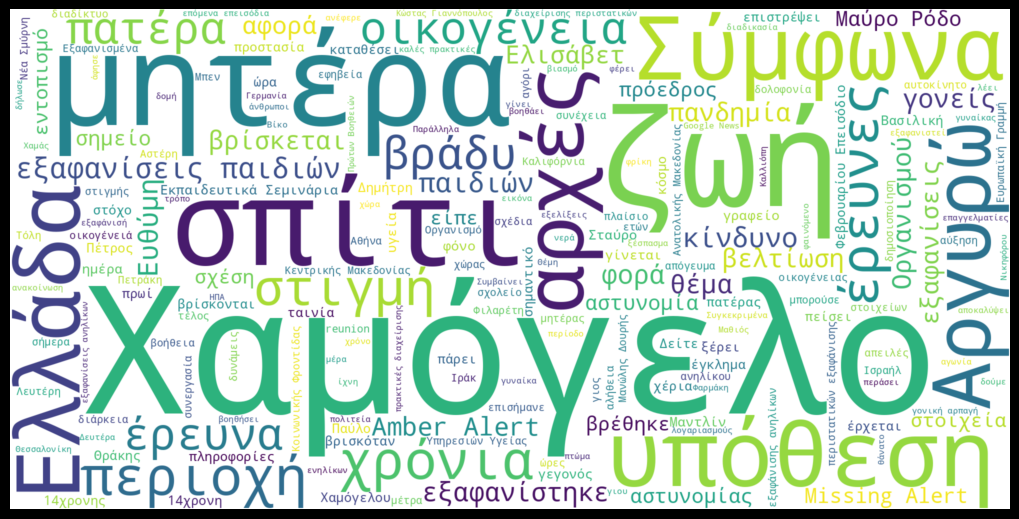

In [ ]:
wordcloud = WordCloud(
    stopwords =all_stopwords,
    width = 2000,
    height = 1000,
    background_color = 'white'
  ).generate(text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
mask = np.array(Image.open("/content/gdrive/MyDrive/3p1icbe5cfs0.webp"))

In [ ]:
wordcloud = WordCloud(stopwords=all_stopwords, background_color='white', mode='RGBA', max_words=5000, mask=mask).generate(text)

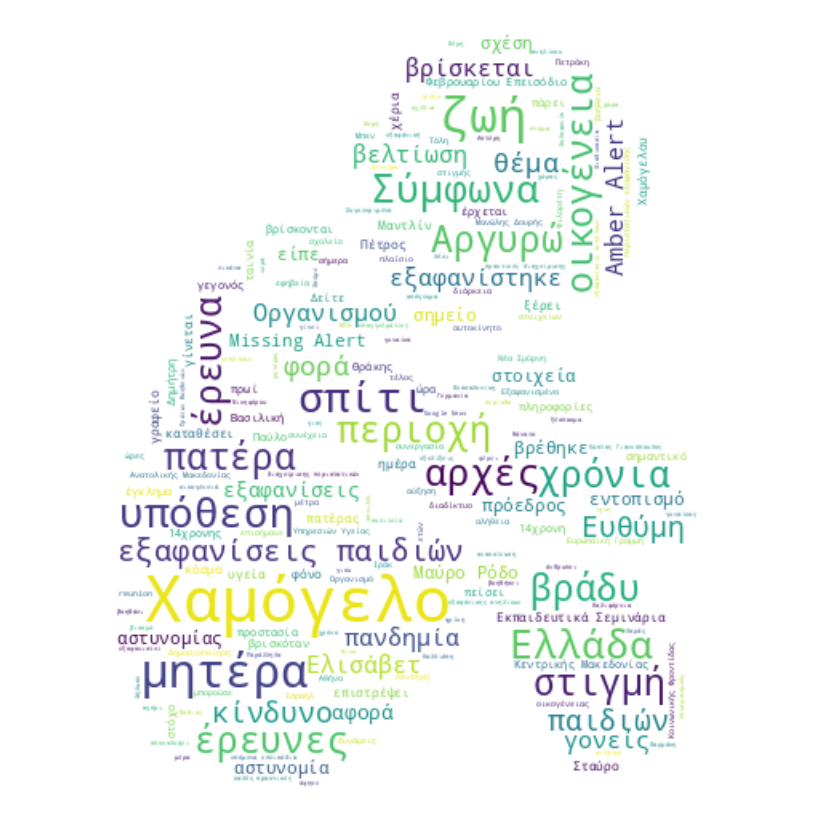

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)



<Axes: ylabel='type'>

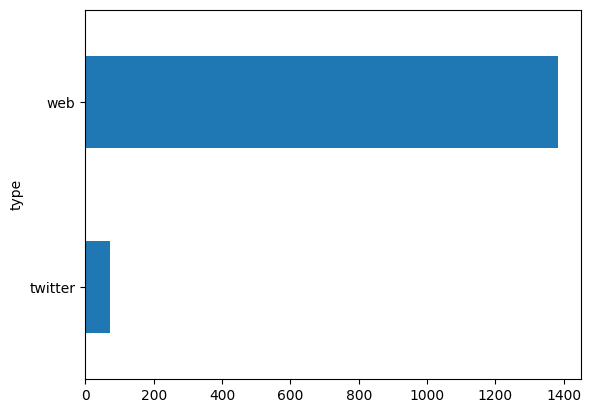

In [ ]:
df['type'].value_counts().sort_values(ascending=True).plot(kind='barh')

<Axes: ylabel='sentiment'>

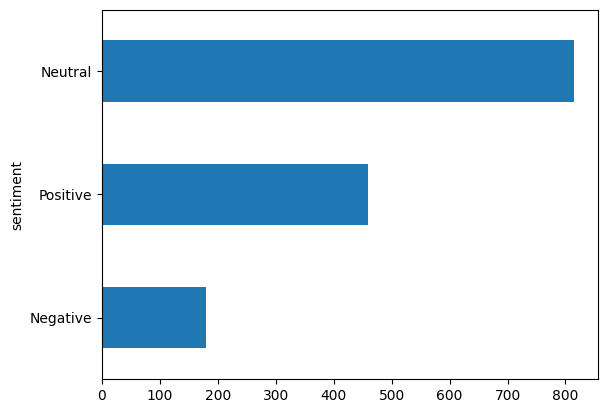

In [ ]:
df['sentiment'].value_counts().sort_values(ascending=True).plot(kind='barh')

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
articles_per_day = df.groupby(df['date'].dt.strftime('%Y-%m-%d')).size().reset_index(name='count')


dates_with_more_than_10_articles = articles_per_day[articles_per_day['count'] > 50]['date']


print(dates_with_more_than_10_articles)

5      2023-01-11
107    2023-06-12
Name: date, dtype: object


In [ ]:

count = df['title'].str.contains('Χαμόγελο του Παιδιού','χαμόγελο του παιδιού').sum()

print(f"Ο αριθμός των άρθρων που περιέχουν στον τίτλο τους το 'χαμόγελο του παιδιού' είναι: {count}")

Ο αριθμός των άρθρων που περιέχουν στον τίτλο τους το 'χαμόγελο του παιδιού' είναι: 140


In [ ]:
count = df['text'].str.contains('Χαμόγελο του Παιδιού','χαμόγελο του παιδιού').sum()

print(f"Στα κείμενα εμπεριέχεται το 'χαμόγελο του παιδιού' : {count}")

Στα κείμενα εμπεριέχεται το 'χαμόγελο του παιδιού' : 421
